# Tratamiento de imágenes y vídeos con OpenCV

<b>Fuentes:</b> 
1. [Tutoriales oficiales de OpenCV](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html)
2. Joseph Howse and Joe Minichino, [Learning OpenCV 4 Computer Vision with Python3](https://learning-oreilly-com.bibproxy.ulpgc.es/library/view/learning-opencv-4/9781789531619/), Packt, 2020 (accesible en O'Reilly)
3. [OpenCV Course - Full Tutorial with Python](https://www.youtube.com/watch?v=oXlwWbU8l2o)


## Transformaciones geométricas

Traslación:
$\begin{equation}
\mathbf{x}'=\left[
   \begin{array}[ccc] \\
      1 & 0 & t_x\\
      0 & 1 & t_y\\
      0 & 0 & 1\\
   \end{array}
\right] \mathbf{x}
\end{equation}$

$\begin{equation}
\mathbf{T}=\left[
   \begin{array}[ccc] \\
      1 & 0 & t_x\\
      0 & 1 & t_y\\
   \end{array}
\right] 
\end{equation}$


Transformación Euclídea:
$\begin{equation}
\mathbf{x}'=\left[
   \begin{array}[ccc] \\
      \cos(\theta) & -\sin(\theta) & t_x\\
      \sin(\theta) & \cos(\theta) & t_y\\
      0 & 0 & 1\\
   \end{array}
\right] \mathbf{x}
\end{equation}$

$\begin{equation}
\mathbf{T}=\left[
   \begin{array}[ccc] \\
      \cos(\theta) & -\sin(\theta) & t_x\\
      \sin(\theta) & \cos(\theta) & t_y\\
   \end{array}
\right]
\end{equation}$


Transformación de similaridad:
$\begin{equation}
\mathbf{x}'=\left[
   \begin{array}[ccc] \\
      s\cos(\theta) & -s\sin(\theta) & t_x\\
      s\sin(\theta) & s\cos(\theta) & t_y\\
      0 & 0 & 1\\
   \end{array}
\right] \mathbf{x}
\end{equation}$

$\begin{equation}
\mathbf{T}=\left[
   \begin{array}[ccc] \\
      s\cos(\theta) & -s\sin(\theta) & t_x\\
      s\sin(\theta) & s\cos(\theta) & t_y\\
   \end{array}
\right] 
\end{equation}$


Transformación afín:
$\begin{equation}
\mathbf{x}'=\left[
   \begin{array}[ccc] \\
      a_{11} & a_{12} & t_x\\
      a_{21} & a_{22} & t_y\\
      0 & 0 & 1\\
   \end{array}
\right] \mathbf{x}
\end{equation}$

$\begin{equation}
\mathbf{T}=\left[
   \begin{array}[ccc] \\
      a_{11} & a_{12} & t_x\\
      a_{21} & a_{22} & t_y\\
   \end{array}
\right] 
\end{equation}$


Transformación proyectiva:
$\begin{equation}
\mathbf{x}'=\left[
   \begin{array}[ccc] \\
      p_{11} & p_{12} & p_{13}\\
      p_{21} & p_{22} & p_{23}\\
      p_{31} & p_{32} & p_{33}\\
   \end{array}
\right] \mathbf{x}
\end{equation}$

$\begin{equation}
\mathbf{T}=\left[
   \begin{array}[ccc] \\
      p_{11} & p_{12} & p_{13}\\
      p_{21} & p_{22} & p_{23}\\
      p_{31} & p_{32} & p_{33}\\
   \end{array}
\right]
\end{equation}$



In [1]:
# Transformaciones geométricas 2D
import cv2 as cv
import numpy as np

image = cv.imread('images/cats.png')
size = (image.shape[1], image.shape[0])

cv.imshow('Original', image)

# traslación
tx,ty = 100.0, -50.0

T_homogenea = np.float32([[1,0,tx],
                          [0,1,ty],
                          [0,0,1]])

T_afin = T_homogenea[:2, :]

imageT = cv.warpAffine(image, T_afin, size)

cv.imshow('Traslacion', imageT)

cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:

image = cv.imread('images/cats.png')
size = (image.shape[1], image.shape[0])

# traslación
tx,ty = 100.0, 50.0
T = np.float32([[1,0,tx],
                [0,1,ty]])

imageT = cv.warpAffine(image, T, size)

cv.imshow('Traslacion', imageT)

# rotación
a = np.pi/6
T = np.float32(
    [[np.cos(a),-np.sin(a),tx],
     [np.sin(a),np.cos(a),ty]]
)
imageR = cv.warpAffine(image, T, size)

cv.imshow('Rotacion', imageR)

# similaridad
s=0.5
T = np.float32(
    [[s*np.cos(a),-s*np.sin(a),tx],
     [s*np.sin(a),s*np.cos(a),ty]])

imageS = cv.warpAffine(image, T, size)

cv.imshow('Similaridad', imageS)

cv.waitKey(0)
cv.destroyAllWindows()

In [1]:
# Cálculo de transformaciones
import cv2 as cv
import numpy as np

image = cv.imread('images/cats.png')

size = (image.shape[1], image.shape[0])
w,h = size

# Calcular rotación en el centro
center = (image.shape[1]/2, image.shape[0]/2)
angle = -30
scale = 0.75
Tr = cv.getRotationMatrix2D(center, angle, scale)
imageR = cv.warpAffine(image, Tr, size)

cv.imshow('Rotacion', imageR)

# Calcular afinidad

#Estos puntos no están en una misma línea y 
#están distribuidos de manera que la transformación afín 
#se puede calcular correctamente.

pts1 = np.float32([[0,0],[0,20],[30,0]])
pts2 = np.float32([[0,0],[10,15],[20,2]])
Ta = cv.getAffineTransform(pts1,pts2)
imageA = cv.warpAffine(image,Ta,size)
cv.imshow('Afin',imageA)

# Calcular transformación proyectiva
pts1 = np.float32([[0,0],[0,h],[w,h],[w,0]])
pts2 = np.float32([[10,10],[10,h-10],[w-10,h-150],[w-10,150]])
Tp = cv.getPerspectiveTransform(pts1,pts2)
#imageP = cv.warpAffine(image,Tp,size)
imageP = cv.warpPerspective(image,Tp,size)
cv.imshow('Proyectiva',imageP)

cv.waitKey(0)
cv.destroyAllWindows()


In [3]:
# Ejercicio 1: rotación de 1 grado con respecto a imagen anterior
image = cv.imread('images/cats.png')

size = (image.shape[1], image.shape[0])
w,h = size

rotPoint = (w/2, h/2)
scale = 1


for angle in range(360):
    rotMat = cv.getRotationMatrix2D(rotPoint, 1, scale)
    image = cv.warpAffine(image, rotMat, size)

    cv.imshow('Rotacion a partir de la imagen previa', image)

    if cv.waitKey(20) == 27:
        break

cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
# Ejercicio: rotación con respecto a la imagen original
import cv2 as cv
import numpy as np

image = cv.imread('images/cats.png')

size = (image.shape[1], image.shape[0])
w,h = size

rotPoint = (w/2, h/2)
scale = 1


for angle in range(360):
    rotMat = cv.getRotationMatrix2D(rotPoint, angle, scale)
    imageR = cv.warpAffine(image, rotMat, size)

    cv.imshow('Rotacion a partir de la imagen original', imageR)
    
    if cv.waitKey(20) == 27:
        break
cv.waitKey(0)
cv.destroyAllWindows()

In [1]:
# Ejercicio: Aplicar una transformación proyectiva de forma continua, reduciendo un lado y ampliando el otro
import cv2 as cv
import numpy as np
import time

image = cv.imread('images/cats.png')

size = (image.shape[1], image.shape[0])
w,h = size

pts1 = np.float32([[0,0],[0,h],[w,h],[w,0]])

inc=1
p=1
while True:
    pts2 = np.float32([[10,10],[10,h-10],[w-10,h-p],[w-10,p]])
    Tp = cv.getPerspectiveTransform(pts1,pts2)
    imageP = cv.warpPerspective(image,Tp,size)
    
    cv.imshow('Proyectiva',imageP)
    
    if cv.waitKey(10) == 27:
        break
        
    p += inc
    if p>=h//2 or p <=-10:
        inc = -inc

cv.waitKey(0)
cv.destroyAllWindows()


In [2]:
# Ejercicio: Proyectar un vídeo en una zona de la imagen aplicando una transformación proyectiva
import cv2 as cv
import numpy as np

video = cv.VideoCapture('videos/times-square.mp4')
#video = cv.VideoCapture(0)
status, frame = video.read()

size = (frame.shape[1], frame.shape[0])
w,h = size

pts1 = np.float32([[0,0],[0,h],[w,h],[w,0]])

inc=1
p=1
h //= 2
w //= 2
h0 = h//2
w0 = w//2

status = True
while status:
    pts2 = np.float32([[w0,h0-p],[w0,h0+h+p],[w0+w-10,h0+h-p],[w0+w-10,h0+p]])
    Tp = cv.getPerspectiveTransform(pts1,pts2)

    status, frame = video.read()
    
    if status:
        imageP = cv.warpPerspective(frame,Tp,size)
        
        # dibujamos contorno
        pts = pts2.astype(np.int32)
        pts = pts.reshape((-1,1,2))
        cv.polylines(imageP,[pts],True,(255,255,0),4)

        cv.imshow('Proyectiva',imageP)

    if cv.waitKey(10) == 27:
        break
        
    p += inc
    if p>=h//2 or p <=-h//2:
        inc = -inc

cv.waitKey(0)
video.release()
cv.destroyAllWindows()



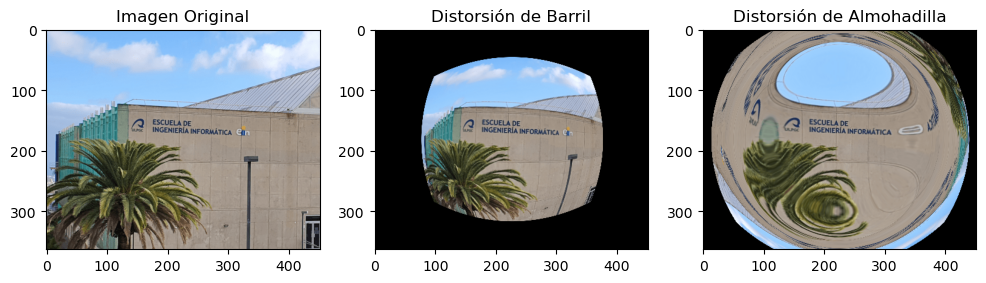

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_distortion(image, k1, k2):
    h, w = image.shape[:2]
    # Generar nueva matriz de cámara a partir de los parámetros
    distCoeff = np.zeros((4,1), np.float64)
    distCoeff[0,0] = k1  # Término de primer orden
    distCoeff[1,0] = k2  # Término de segundo orden

    # Suponer matriz unitaria para la cámara
    cam = np.eye(3, dtype=np.float32)
    cam[0,2] = w/2.0  # Definir centro x
    cam[1,2] = h/2.0  # Definir centro y
    cam[0,0] = 10.    # Definir longitud focal x
    cam[1,1] = 10.    # Definir longitud focal y

    # Aplicar distorsión a la imagen
    distorted_img = cv2.undistort(image, cam, distCoeff)

    return distorted_img

# Cargar una imagen de ejemplo
image = cv2.imread('images/eii.png')

# Verificar si la imagen se ha cargado correctamente
if image is None:
    print("Error: No se pudo cargar la imagen. ")
else:
    # Aplicar distorsión de barril (k1 > 0)
    distorsion_barril_img = apply_distortion(image, k1=0.00001, k2=0.00001)

    # Aplicar distorsión de almohadilla (k1 < 0)
    distorsion_almohadilla_img = apply_distortion(image, k1=-0.00001, k2=-0.00001)

    # Mostrar las imágenes
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.title('Imagen Original')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) #Hay que pasar de BGR a RGB porque ese es orden de los canales
                                                       #que espera matplotlib
    plt.subplot(1, 3, 2)
    plt.title('Distorsión de Barril')
    plt.imshow(cv2.cvtColor(distorsion_barril_img, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 3, 3)
    plt.title('Distorsión de Almohadilla')
    plt.imshow(cv2.cvtColor(distorsion_almohadilla_img, cv2.COLOR_BGR2RGB))

    plt.show()

In [2]:
# resize images. Cambia el tamaño de la imagen.
import cv2 as cv

image = cv.imread('images/figuras.png')

cv.imshow('EII', image)

dimension = (2*image.shape[1],2*image.shape[0])
resize = cv.resize(image, dimension, cv.INTER_CUBIC)

cv.imshow('EII_resize', resize)

cv.waitKey(0)
cv.destroyAllWindows()


In [1]:
# resize video. Cambia el tamaño del vídeo.
import cv2 as cv

def reescalar(frame, scale=2):
    width = int(frame.shape[1]*scale)
    height = int(frame.shape[0]*scale)
    return cv.resize(frame, (width, height), interpolation=cv.INTER_AREA)

video = cv.VideoCapture('videos/times-square.mp4')

while True:
    state, frame = video.read()

    cv.imshow('Video', frame)
    
    cv.imshow('Video redimensionado escala=0.5', reescalar(frame, scale=0.5))

    cv.imshow('Video redimensionado escala=2', reescalar(frame, scale=2.0))
    
    
    if cv.waitKey(20)==27:
        break

video.release()
cv.destroyAllWindows()


error: OpenCV(4.12.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - resize() missing required argument 'dsize' (pos 2)
>  - resize() missing required argument 'dsize' (pos 2)
